In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import seaborn as sb
import math
from datetime import date
from windrose import WindroseAxes

In [2]:
data = pd.read_csv('ERA5_VASTO.csv', encoding= 'unicode_escape')
data

ANNO  MESE  GIORNO  ORA  Hs(m)  MWD(°N)  PWP(s)  MWP(s)  U10(m/s)  \
0       1979     1       1    0   0.62   195.57    4.20    3.97      1.85   
1       1979     1       1    1   0.58   196.31    4.21    4.00      1.21   
2       1979     1       1    2   0.55   198.24    4.21    4.00      0.66   
3       1979     1       1    3   0.55   201.66    4.19    3.97      0.92   
4       1979     1       1    4   0.56   206.96    4.04    3.97      1.09   
...      ...   ...     ...  ...    ...      ...     ...     ...       ...   
368179  2020    12      31   19   0.78   327.88    5.74    5.09     -1.27   
368180  2020    12      31   20   0.73   328.18    5.72    5.04     -0.86   
368181  2020    12      31   21   0.69   328.39    5.70    4.97     -0.58   
368182  2020    12      31   22   0.65   328.23    5.67    4.84     -0.52   
368183  2020    12      31   23   0.61   328.18    5.64    4.70     -0.37   

        V10(m/s)  
0           2.34  
1           3.01  
2           3.44  
3           3.70  
4           3.79  
...          ...  
368179      1.39  
368180      1.86  
368181      1.98  
368182      2.62  
368183      2.68  

[368184 rows x 10 columns]

In [3]:
yyyy = np.array(data['ANNO'])
mm = np.array(data['MESE'])
dd = np.array(data['GIORNO'])
hh = np.array(data['ORA'])
# minu = np.array(np.zeros_like(yyyy))
# sec = np.array(np.zeros_like(yyyy))
# date = datenum(yyyy,mm,dd,hh,min,sec);
Hs = np.array(data['Hs(m)'])
Dir = np.array(data['MWD(°N)'])
Tp = np.array(data['PWP(s)'])
U10 = np.array(data['U10(m/s)'])
V10 = np.array(data['V10(m/s)'])
W10 = np.sqrt(np.add(np.power(U10, 2), np.power(V10, 2)))
Dir_wind = np.arctan2(V10, U10)
Dir_wind = np.rad2deg(Dir_wind)


In [4]:
date_1 = data[data['ANNO']==2009][data['MESE']==1][data['GIORNO']==1][data['ORA']==1]
date_2 = data[data['ANNO']==2020][data['MESE']==12][data['GIORNO']==31][data['ORA']==23]
ind_date_1 = int(date_1.index.values)
ind_date_2 = int(date_2.index.values)

C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/2938820404.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_1 = data[data['ANNO']==2009][data['MESE']==1][data['GIORNO']==1][data['ORA']==1]
C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/2938820404.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_2 = data[data['ANNO']==2020][data['MESE']==12][data['GIORNO']==31][data['ORA']==23]


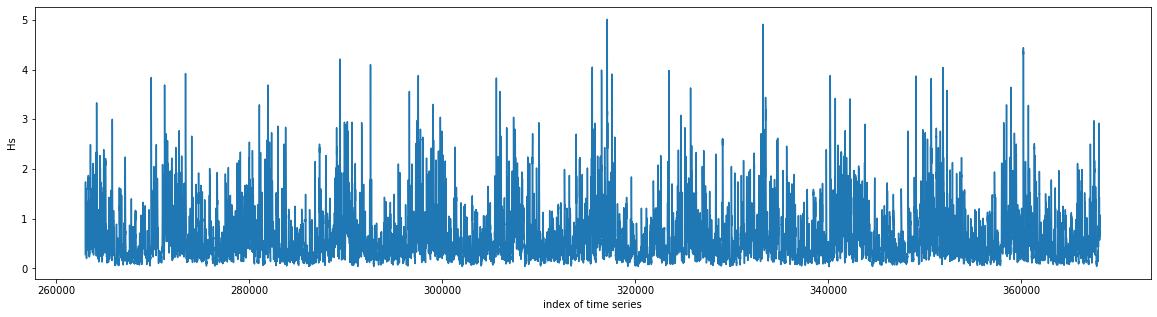

In [5]:
plt.figure(figsize=(20,5))
plt.plot(range(ind_date_1,ind_date_2),Hs[ind_date_1:ind_date_2])
plt.xlabel('index of time series')
plt.ylabel('Hs')
plt.show()

In [6]:
Dir_new = np.mod(90 - Dir,360)
data['Dir_new'] = Dir_new

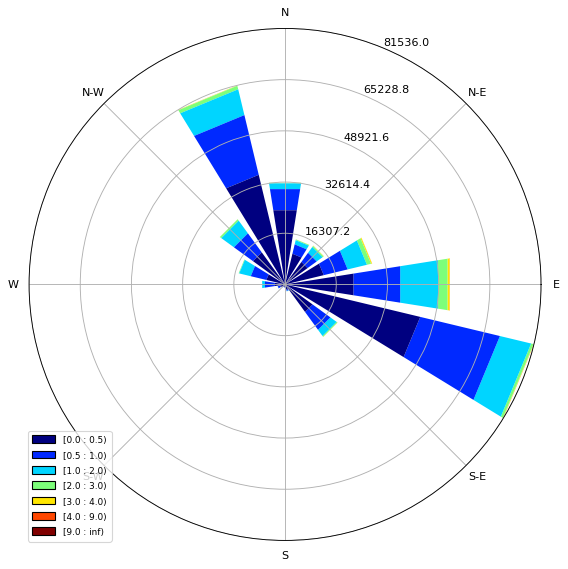

In [7]:
ax = WindroseAxes.from_ax()
ax.bar(Dir_new,Hs, bins=[0,0.5,1,2,3,4,9])
ax.set_legend()

In [176]:
data_jan = data.loc[data.MESE== 1, :]
data_feb = data.loc[data.MESE== 2, :]
data_mar = data.loc[data.MESE== 3, :]
data_apr = data.loc[data.MESE== 4, :]
data_may = data.loc[data.MESE== 5, :]
data_jun = data.loc[data.MESE== 6, :]
data_jul = data.loc[data.MESE== 7, :]
data_agu = data.loc[data.MESE== 8, :]
data_sep = data.loc[data.MESE== 9, :]
data_oct = data.loc[data.MESE== 10, :]
data_nov = data.loc[data.MESE== 11, :]
data_dec = data.loc[data.MESE== 12, :]

data_spring = data_mar.append([data_apr, data_may])[['Hs(m)','Dir_new']]
data_summer = data_jun.append([data_jul, data_agu])[['Hs(m)','Dir_new']]
data_autumn = data_sep.append([data_oct, data_nov])[['Hs(m)','Dir_new']]
data_winter = data_dec.append([data_jan, data_feb])[['Hs(m)','Dir_new']]

In [9]:
# PLOTTING FOR SPRING

spring_dir = np.array(data_spring['Dir_new'])
spring_Hs = np.array(data_spring['Hs(m)'])

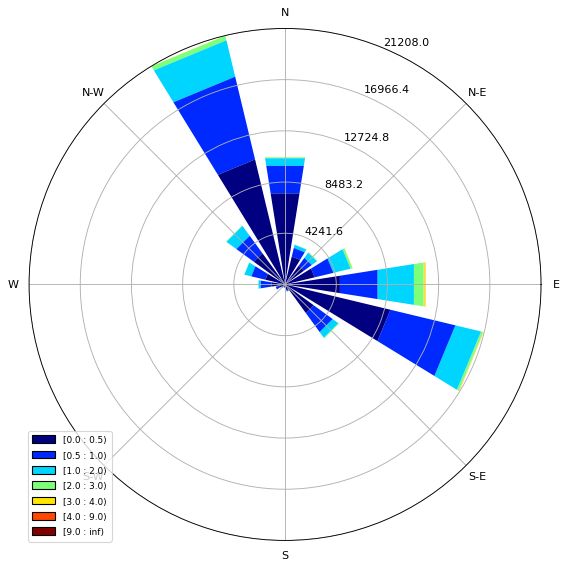

In [10]:
ax = WindroseAxes.from_ax()
ax.bar(spring_dir,spring_Hs, bins=[0,0.5,1,2,3,4,9])
ax.set_legend()

In [11]:
# PLOTTING FOR summer

summer_dir = np.array(data_summer['Dir_new'])
summer_Hs = np.array(data_summer['Hs(m)'])

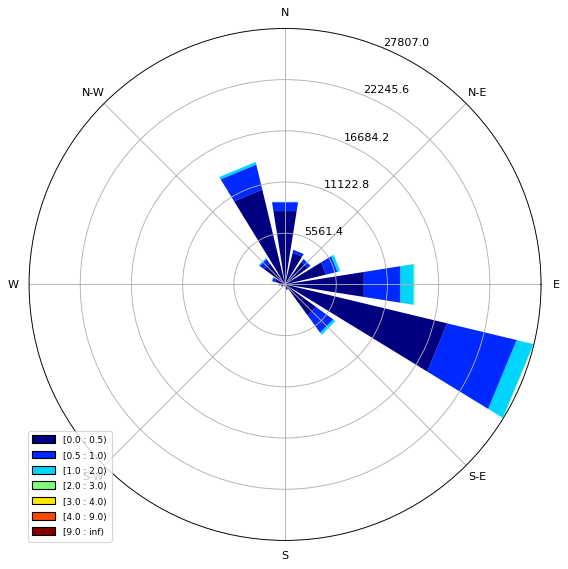

In [12]:
ax = WindroseAxes.from_ax()
ax.bar(summer_dir,summer_Hs, bins=[0,0.5,1,2,3,4,9])
ax.set_legend()

In [13]:
# PLOTTING FOR autumn

autumn_dir = np.array(data_autumn['Dir_new'])
autumn_Hs = np.array(data_autumn['Hs(m)'])

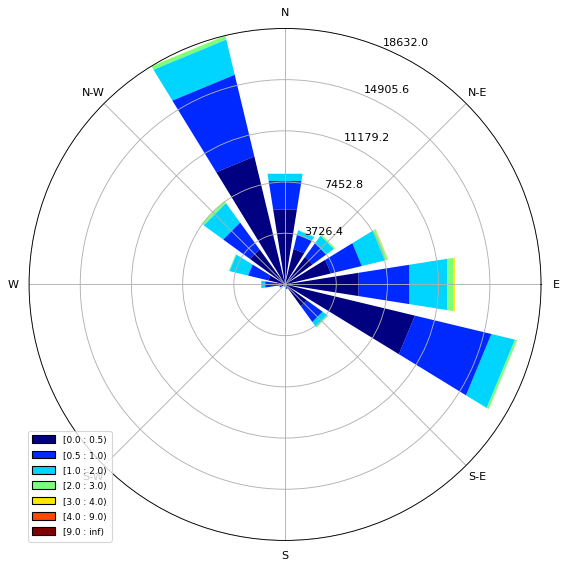

In [14]:
ax = WindroseAxes.from_ax()
ax.bar(autumn_dir,autumn_Hs, bins=[0,0.5,1,2,3,4,9])
ax.set_legend()

In [15]:
# PLOTTING FOR autumn

winter_dir = np.array(data_winter['Dir_new'])
winter_Hs = np.array(data_winter['Hs(m)'])

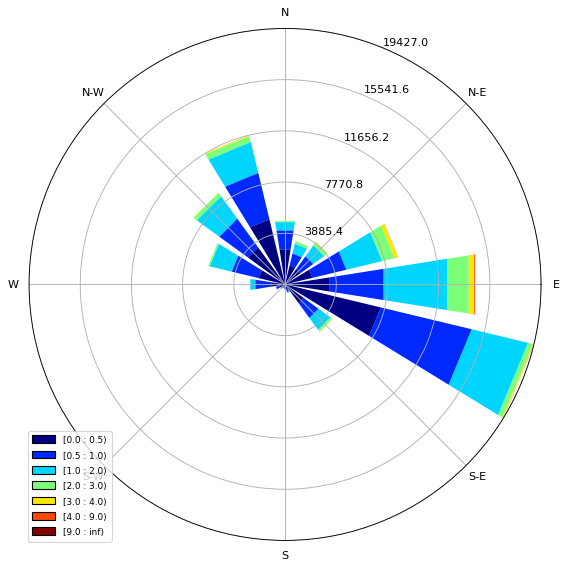

In [16]:
ax = WindroseAxes.from_ax()
ax.bar(winter_dir,winter_Hs, bins=[0,0.5,1,2,3,4,9])
ax.set_legend()

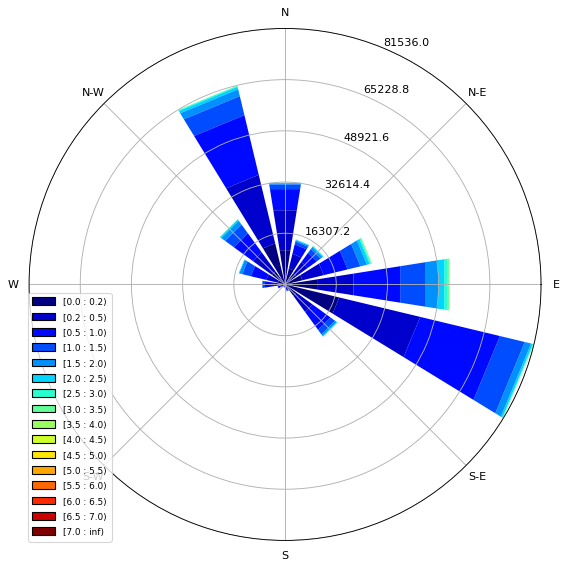

In [17]:
ax = WindroseAxes.from_ax()
ax.bar(Dir_new,Hs, bins=[0, 0.25, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5, 7])
ax.set_legend()

In [177]:
# Spring Climate table

bins=[0.0,0.5,1.0,2.0,3.0,4.0,9.0]
dir_tot = [  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]
spring_table = []


for i in range(len(dir_tot)-1):
    spe_dir = np.array(data_spring)
    mm = np.where((np.squeeze(spe_dir[:,1:]) >= dir_tot[i]) & (np.squeeze(spe_dir[:,1:]) <dir_tot[i+1]))
    x = spe_dir[np.squeeze(mm)]
    column = []
    for j in range(len(bins)-1):
        nn = np.where((np.squeeze(x[:,:1]) >= bins[j]) & (np.squeeze(x[:,:1]) <bins[j+1]))
        y = x[np.squeeze(nn)]
        column.append(len(y)/len(data_spring))
    spring_table.append(column)
    
spring_table = pd.DataFrame(np.array(spring_table))

spring_table.columns =['0.0<= Hs <0.5', '0.5<= Hs <1.0',
                '1.0<= Hs <2.0', '2.0<= Hs <3.0',
                '3.0<= Hs <4.0', '4.0<= Hs <9.0']
spring_table.index = ['0<= θ <15', '15<= θ <30', '30<= θ <45', '45<= θ <60',
               '60<= θ <75', '75<= θ <90', '90<= θ <105', '105<= θ <120',
              '120<= θ <135', '135<= θ <150', '150<= θ <165', '165<= θ <180',
              '180<= θ <195', '195<= θ <210', '210<= θ <225', '225<= θ <240',
              '240<= θ <255', '255<= θ <270', '270<= θ <285', '285<= θ <300',
              '300<= θ <315', '315<= θ <330', '330<= θ <345', '345<= θ <360']

In [178]:
spring_table

0.0<= Hs <0.5  0.5<= Hs <1.0  1.0<= Hs <2.0  2.0<= Hs <3.0  \
0<= θ <15          0.027756       0.006200       0.002707       0.000421   
15<= θ <30         0.016800       0.005273       0.001812       0.000270   
30<= θ <45         0.013954       0.005219       0.003106       0.000226   
45<= θ <60         0.013867       0.006200       0.004745       0.000323   
60<= θ <75         0.018245       0.012045       0.010179       0.001165   
75<= θ <90         0.025610       0.018008       0.019723       0.005101   
90<= θ <105        0.042400       0.028414       0.022418       0.004313   
105<= θ <120       0.068981       0.040017       0.015496       0.001305   
120<= θ <135       0.038119       0.028673       0.008044       0.000873   
135<= θ <150       0.009586       0.003321       0.001488       0.000140   
150<= θ <165       0.003310       0.000367       0.000270       0.000043   
165<= θ <180       0.002135       0.000280       0.000065       0.000000   
180<= θ <195       0.001650       0.000237       0.000065       0.000000   
195<= θ <210       0.001607       0.000259       0.000032       0.000000   
210<= θ <225       0.002437       0.000323       0.000022       0.000000   
225<= θ <240       0.002114       0.000485       0.000065       0.000000   
240<= θ <255       0.003580       0.001876       0.000205       0.000000   
255<= θ <270       0.006826       0.005036       0.000690       0.000000   
270<= θ <285       0.009435       0.007440       0.002070       0.000022   
285<= θ <300       0.011980       0.008724       0.004184       0.000065   
300<= θ <315       0.016703       0.009931       0.006610       0.000173   
315<= θ <330       0.031067       0.017113       0.008540       0.000604   
330<= θ <345       0.074221       0.050735       0.023853       0.003623   
345<= θ <360       0.090828       0.039801       0.011689       0.000755   

              3.0<= Hs <4.0  4.0<= Hs <9.0  
0<= θ <15          0.000086       0.000000  
15<= θ <30         0.000000       0.000000  
30<= θ <45         0.000043       0.000075  
45<= θ <60         0.000129       0.000043  
60<= θ <75         0.000151       0.000000  
75<= θ <90         0.001003       0.000043  
90<= θ <105        0.000658       0.000248  
105<= θ <120       0.000313       0.000075  
120<= θ <135       0.000108       0.000000  
135<= θ <150       0.000000       0.000000  
150<= θ <165       0.000000       0.000000  
165<= θ <180       0.000000       0.000000  
180<= θ <195       0.000000       0.000000  
195<= θ <210       0.000000       0.000000  
210<= θ <225       0.000000       0.000000  
225<= θ <240       0.000000       0.000000  
240<= θ <255       0.000000       0.000000  
255<= θ <270       0.000000       0.000000  
270<= θ <285       0.000000       0.000000  
285<= θ <300       0.000000       0.000000  
300<= θ <315       0.000000       0.000000  
315<= θ <330       0.000000       0.000000  
330<= θ <345       0.000194       0.000000  
345<= θ <360       0.000151       0.000000

In [181]:
# summer Climate table

bins=[0.0,0.5,1.0,2.0,3.0,4.0,9.0]
dir_tot = [  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]
spring_table = []

for i in range(len(dir_tot)-1):
    spe_dir = np.array(data_summer)
    mm = np.where((np.squeeze(spe_dir[:,1:]) >= dir_tot[i]) & (np.squeeze(spe_dir[:,1:]) <dir_tot[i+1]))
    x = spe_dir[np.squeeze(mm)]
    column = []
    for j in range(len(bins)-1):
        nn = np.where((np.squeeze(x[:,:1]) >= bins[j]) & (np.squeeze(x[:,:1]) <bins[j+1]))
        y = x[np.squeeze(nn)]
        column.append(len(y)/len(data_spring))
    spring_table.append(column)
    
spring_table = pd.DataFrame(np.array(spring_table))

spring_table.columns =['0.0<= Hs <0.5', '0.5<= Hs <1.0',
                '1.0<= Hs <2.0', '2.0<= Hs <3.0',
                '3.0<= Hs <4.0', '4.0<= Hs <9.0']
spring_table.index = ['0<= θ <15', '15<= θ <30', '30<= θ <45', '45<= θ <60',
               '60<= θ <75', '75<= θ <90', '90<= θ <105', '105<= θ <120',
              '120<= θ <135', '135<= θ <150', '150<= θ <165', '165<= θ <180',
              '180<= θ <195', '195<= θ <210', '210<= θ <225', '225<= θ <240',
              '240<= θ <255', '255<= θ <270', '270<= θ <285', '285<= θ <300',
              '300<= θ <315', '315<= θ <330', '330<= θ <345', '345<= θ <360']
spring_table

0.0<= Hs <0.5  0.5<= Hs <1.0  1.0<= Hs <2.0  2.0<= Hs <3.0  \
0<= θ <15          0.037558       0.003720       0.000097       0.000000   
15<= θ <30         0.024618       0.002620       0.000032       0.000000   
30<= θ <45         0.021405       0.002081       0.000108       0.000000   
45<= θ <60         0.023853       0.003753       0.000507       0.000000   
60<= θ <75         0.032878       0.008778       0.002200       0.000086   
75<= θ <90         0.045268       0.020240       0.006459       0.000582   
90<= θ <105        0.084918       0.037407       0.013846       0.000949   
105<= θ <120       0.144162       0.058543       0.013878       0.000334   
120<= θ <135       0.058834       0.036394       0.005597       0.000582   
135<= θ <150       0.011743       0.002696       0.000431       0.000022   
150<= θ <165       0.003742       0.000377       0.000086       0.000000   
165<= θ <180       0.002103       0.000194       0.000000       0.000000   
180<= θ <195       0.001499       0.000205       0.000000       0.000000   
195<= θ <210       0.001165       0.000162       0.000000       0.000000   
210<= θ <225       0.001326       0.000194       0.000022       0.000000   
225<= θ <240       0.001790       0.000270       0.000032       0.000000   
240<= θ <255       0.002588       0.000830       0.000065       0.000000   
255<= θ <270       0.002566       0.001607       0.000183       0.000000   
270<= θ <285       0.004464       0.001747       0.000270       0.000000   
285<= θ <300       0.008206       0.002060       0.000636       0.000000   
300<= θ <315       0.013468       0.003267       0.000787       0.000000   
315<= θ <330       0.029827       0.006384       0.000938       0.000000   
330<= θ <345       0.074965       0.021955       0.002502       0.000075   
345<= θ <360       0.085954       0.013156       0.000992       0.000000   

              3.0<= Hs <4.0  4.0<= Hs <9.0  
0<= θ <15          0.000000            0.0  
15<= θ <30         0.000000            0.0  
30<= θ <45         0.000000            0.0  
45<= θ <60         0.000000            0.0  
60<= θ <75         0.000000            0.0  
75<= θ <90         0.000043            0.0  
90<= θ <105        0.000065            0.0  
105<= θ <120       0.000065            0.0  
120<= θ <135       0.000000            0.0  
135<= θ <150       0.000000            0.0  
150<= θ <165       0.000000            0.0  
165<= θ <180       0.000000            0.0  
180<= θ <195       0.000000            0.0  
195<= θ <210       0.000000            0.0  
210<= θ <225       0.000000            0.0  
225<= θ <240       0.000000            0.0  
240<= θ <255       0.000000            0.0  
255<= θ <270       0.000000            0.0  
270<= θ <285       0.000000            0.0  
285<= θ <300       0.000000            0.0  
300<= θ <315       0.000000            0.0  
315<= θ <330       0.000000            0.0  
330<= θ <345       0.000000            0.0  
345<= θ <360       0.000000            0.0

In [182]:
# autumn Climate table

bins=[0.0,0.5,1.0,2.0,3.0,4.0,9.0]
dir_tot = [  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]
spring_table = []

for i in range(len(dir_tot)-1):
    spe_dir = np.array(data_autumn)
    mm = np.where((np.squeeze(spe_dir[:,1:]) >= dir_tot[i]) & (np.squeeze(spe_dir[:,1:]) <dir_tot[i+1]))
    x = spe_dir[np.squeeze(mm)]
    column = []
    for j in range(len(bins)-1):
        nn = np.where((np.squeeze(x[:,:1]) >= bins[j]) & (np.squeeze(x[:,:1]) <bins[j+1]))
        y = x[np.squeeze(nn)]
        column.append(len(y)/len(data_spring))
    spring_table.append(column)
    
spring_table = pd.DataFrame(np.array(spring_table))

spring_table.columns =['0.0<= Hs <0.5', '0.5<= Hs <1.0',
                '1.0<= Hs <2.0', '2.0<= Hs <3.0',
                '3.0<= Hs <4.0', '4.0<= Hs <9.0']
spring_table.index = ['0<= θ <15', '15<= θ <30', '30<= θ <45', '45<= θ <60',
               '60<= θ <75', '75<= θ <90', '90<= θ <105', '105<= θ <120',
              '120<= θ <135', '135<= θ <150', '150<= θ <165', '165<= θ <180',
              '180<= θ <195', '195<= θ <210', '210<= θ <225', '225<= θ <240',
              '240<= θ <255', '255<= θ <270', '270<= θ <285', '285<= θ <300',
              '300<= θ <315', '315<= θ <330', '330<= θ <345', '345<= θ <360']
spring_table

0.0<= Hs <0.5  0.5<= Hs <1.0  1.0<= Hs <2.0  2.0<= Hs <3.0  \
0<= θ <15          0.025104       0.009425       0.002221       0.000097   
15<= θ <30         0.018634       0.007041       0.002405       0.000291   
30<= θ <45         0.017933       0.008098       0.003688       0.000625   
45<= θ <60         0.018353       0.009705       0.006729       0.000701   
60<= θ <75         0.025524       0.016790       0.012088       0.001402   
75<= θ <90         0.031369       0.023475       0.020380       0.003332   
90<= θ <105        0.049096       0.031315       0.017987       0.002858   
105<= θ <120       0.076065       0.042820       0.012487       0.000981   
120<= θ <135       0.029708       0.023270       0.006653       0.000852   
135<= θ <150       0.005640       0.001898       0.000906       0.000173   
150<= θ <165       0.001596       0.000572       0.000140       0.000000   
165<= θ <180       0.000830       0.000388       0.000075       0.000000   
180<= θ <195       0.000647       0.000388       0.000108       0.000000   
195<= θ <210       0.000733       0.000345       0.000108       0.000000   
210<= θ <225       0.000841       0.000345       0.000075       0.000000   
225<= θ <240       0.000647       0.000528       0.000075       0.000000   
240<= θ <255       0.002114       0.001078       0.000205       0.000000   
255<= θ <270       0.003343       0.003580       0.000561       0.000000   
270<= θ <285       0.005737       0.008055       0.004227       0.000140   
285<= θ <300       0.008929       0.010816       0.010697       0.000399   
300<= θ <315       0.015161       0.013943       0.012519       0.001175   
315<= θ <330       0.033148       0.022548       0.012908       0.001391   
330<= θ <345       0.069660       0.047349       0.021577       0.002405   
345<= θ <360       0.062036       0.026883       0.006847       0.000431   

              3.0<= Hs <4.0  4.0<= Hs <9.0  
0<= θ <15          0.000000       0.000000  
15<= θ <30         0.000032       0.000000  
30<= θ <45         0.000237       0.000000  
45<= θ <60         0.000205       0.000032  
60<= θ <75         0.000162       0.000151  
75<= θ <90         0.000388       0.000000  
90<= θ <105        0.001014       0.000000  
105<= θ <120       0.000022       0.000000  
120<= θ <135       0.000097       0.000000  
135<= θ <150       0.000022       0.000000  
150<= θ <165       0.000000       0.000000  
165<= θ <180       0.000000       0.000000  
180<= θ <195       0.000000       0.000000  
195<= θ <210       0.000000       0.000000  
210<= θ <225       0.000000       0.000000  
225<= θ <240       0.000000       0.000000  
240<= θ <255       0.000000       0.000000  
255<= θ <270       0.000000       0.000000  
270<= θ <285       0.000000       0.000000  
285<= θ <300       0.000000       0.000000  
300<= θ <315       0.000000       0.000000  
315<= θ <330       0.000216       0.000000  
330<= θ <345       0.000097       0.000000  
345<= θ <360       0.000022       0.000022

In [184]:
# winter Climate table

bins=[0.0,0.5,1.0,2.0,3.0,4.0,9.0]
dir_tot = [  0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150, 165, 180,
       195, 210, 225, 240, 255, 270, 285, 300, 315, 330, 345, 360]
spring_table = []

for i in range(len(dir_tot)-1):
    spe_dir = np.array(data_winter)
    mm = np.where((np.squeeze(spe_dir[:,1:]) >= dir_tot[i]) & (np.squeeze(spe_dir[:,1:]) <dir_tot[i+1]))
    x = spe_dir[np.squeeze(mm)]
    column = []
    for j in range(len(bins)-1):
        nn = np.where((np.squeeze(x[:,:1]) >= bins[j]) & (np.squeeze(x[:,:1]) <bins[j+1]))
        y = x[np.squeeze(nn)]
        column.append(len(y)/len(data_spring))
    spring_table.append(column)
    
spring_table = pd.DataFrame(np.array(spring_table))

spring_table.columns =['0.0<= Hs <0.5', '0.5<= Hs <1.0',
                '1.0<= Hs <2.0', '2.0<= Hs <3.0',
                '3.0<= Hs <4.0', '4.0<= Hs <9.0']
spring_table.index = ['0<= θ <15', '15<= θ <30', '30<= θ <45', '45<= θ <60',
               '60<= θ <75', '75<= θ <90', '90<= θ <105', '105<= θ <120',
              '120<= θ <135', '135<= θ <150', '150<= θ <165', '165<= θ <180',
              '180<= θ <195', '195<= θ <210', '210<= θ <225', '225<= θ <240',
              '240<= θ <255', '255<= θ <270', '270<= θ <285', '285<= θ <300',
              '300<= θ <315', '315<= θ <330', '330<= θ <345', '345<= θ <360']
spring_table

0.0<= Hs <0.5  0.5<= Hs <1.0  1.0<= Hs <2.0  2.0<= Hs <3.0  \
0<= θ <15          0.014277       0.006944       0.003807       0.000722   
15<= θ <30         0.010611       0.006718       0.005715       0.001553   
30<= θ <45         0.009155       0.007505       0.006524       0.001510   
45<= θ <60         0.011646       0.010977       0.008573       0.002523   
60<= θ <75         0.015355       0.018871       0.019216       0.006815   
75<= θ <90         0.018536       0.029018       0.036749       0.014266   
90<= θ <105        0.034560       0.030344       0.032544       0.007257   
105<= θ <120       0.058338       0.055739       0.032102       0.002556   
120<= θ <135       0.024101       0.025276       0.017350       0.002070   
135<= θ <150       0.005942       0.002092       0.002415       0.000388   
150<= θ <165       0.003052       0.001219       0.000528       0.000022   
165<= θ <180       0.002070       0.000809       0.000237       0.000000   
180<= θ <195       0.001316       0.000679       0.000183       0.000000   
195<= θ <210       0.001413       0.000625       0.000075       0.000000   
210<= θ <225       0.001607       0.000776       0.000129       0.000000   
225<= θ <240       0.002070       0.000776       0.000119       0.000000   
240<= θ <255       0.003246       0.001574       0.000194       0.000000   
255<= θ <270       0.005618       0.006136       0.001391       0.000000   
270<= θ <285       0.010223       0.010902       0.004831       0.000140   
285<= θ <300       0.014158       0.015075       0.012552       0.000863   
300<= θ <315       0.021351       0.018138       0.015905       0.001930   
315<= θ <330       0.028878       0.021060       0.015366       0.003267   
330<= θ <345       0.037332       0.027929       0.018655       0.003591   
345<= θ <360       0.027163       0.015948       0.006880       0.000744   

              3.0<= Hs <4.0  4.0<= Hs <9.0  
0<= θ <15          0.000054       0.000000  
15<= θ <30         0.000205       0.000000  
30<= θ <45         0.000216       0.000000  
45<= θ <60         0.000604       0.000000  
60<= θ <75         0.001984       0.000119  
75<= θ <90         0.003149       0.000496  
90<= θ <105        0.002146       0.000572  
105<= θ <120       0.000410       0.000108  
120<= θ <135       0.000474       0.000054  
135<= θ <150       0.000075       0.000000  
150<= θ <165       0.000000       0.000000  
165<= θ <180       0.000000       0.000000  
180<= θ <195       0.000000       0.000000  
195<= θ <210       0.000000       0.000000  
210<= θ <225       0.000000       0.000000  
225<= θ <240       0.000000       0.000000  
240<= θ <255       0.000000       0.000000  
255<= θ <270       0.000000       0.000000  
270<= θ <285       0.000000       0.000000  
285<= θ <300       0.000000       0.000000  
300<= θ <315       0.000000       0.000000  
315<= θ <330       0.000270       0.000032  
330<= θ <345       0.000647       0.000097  
345<= θ <360       0.000000       0.000000

C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/2943977970.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_1 = data[data['ANNO']==1979][data['MESE']==1][data['GIORNO']==1][data['ORA']==1]
C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/2943977970.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  date_2 = data[data['ANNO']==2020][data['MESE']==12][data['GIORNO']==31][data['ORA']==23]


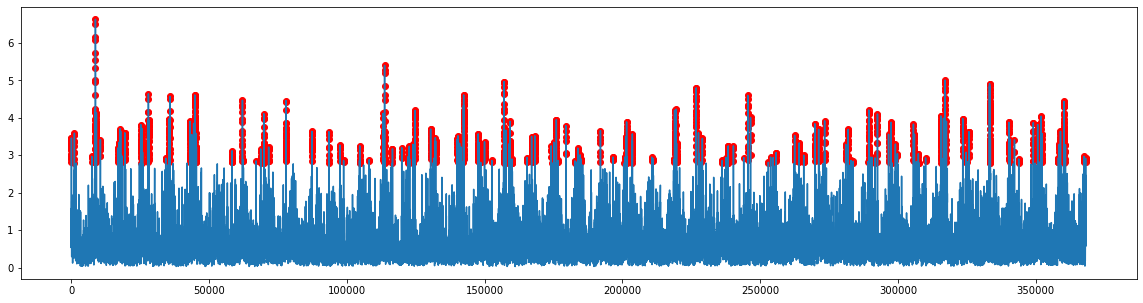

In [242]:
date_1 = data[data['ANNO']==1979][data['MESE']==1][data['GIORNO']==1][data['ORA']==1]
date_2 = data[data['ANNO']==2020][data['MESE']==12][data['GIORNO']==31][data['ORA']==23]
ind_date_1 = int(date_1.index.values)
ind_date_2 = int(date_2.index.values)

plt.figure(figsize=(20,5))
x = range(ind_date_1,ind_date_2)
y = Hs[ind_date_1:ind_date_2]
threshold = 2.8
above_threshold = np.where(y >= threshold)
below_threshold = np.minimum(y, threshold)

plt.plot(x,y)
plt.scatter(above_threshold, y[above_threshold], color= 'r')
plt.show()

In [243]:
y[above_threshold]

array([2.97, 3.19, 3.28, ..., 2.92, 2.92, 2.88])

In [244]:
H_medio = np.mean(y[above_threshold])
H_std = np.std(y[above_threshold])

In [245]:
H_medio, H_std

(3.318385460693153, 0.46965771985641874)

In [246]:
theta = H_std/1.2825
eps = H_medio - 0.45006*H_std


In [247]:
theta, eps

(0.36620484979057993, 3.1070113072945733)

In [248]:
N = len(y[above_threshold]);
M = np.max(yyyy) - np.min(yyyy)
Tr = np.array([1, 5, 10, 25, 50, 100, 500])
Tr_star = Tr*(N/M)
P = 1 - (1/Tr_star)
H_Tr = eps + theta*(-np.log(-np.log(P)))


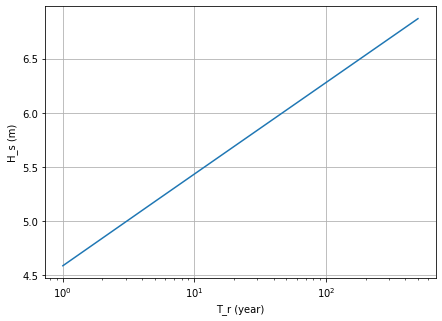

In [249]:
plt.figure(figsize=(7,5))
plt.semilogx(Tr,H_Tr)
plt.xlabel('T_r (year)', size=10)
plt.ylabel('H_s (m)', size=10)
plt.grid()
plt.show()

In [285]:
H_ord = np.sort(y[above_threshold])
H_ord = H_ord[::-1]

T_o = []
for i in range(1,len(H_ord)):
    F_i = 1-(i/(N+1))
    Tr_ord = (1/(1-F_i))*M/N
    T_o.append(Tr_ord)


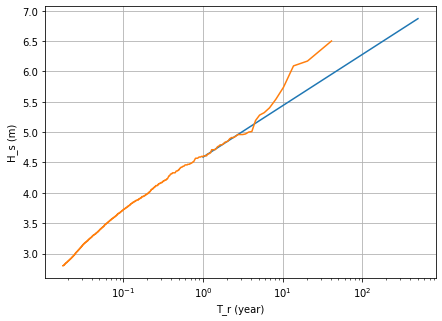

In [288]:
plt.figure(figsize=(7,5))
plt.semilogx(Tr,H_Tr)
plt.semilogx(T_o,H_ord[1:])
plt.xlabel('T_r (year)', size=10)
plt.ylabel('H_s (m)', size=10)
plt.grid()
plt.show()

In [289]:
P_H = np.exp(-(np.exp(-(y[above_threshold]-eps)/theta)))
P_H_O = np.exp(-(np.exp(-(H_ord-eps)/theta)))

In [296]:
H_ord, y[above_threshold]

(array([6.63, 6.5 , 6.17, ..., 2.8 , 2.8 , 2.8 ]),
 array([2.97, 3.19, 3.28, ..., 2.92, 2.92, 2.88]))

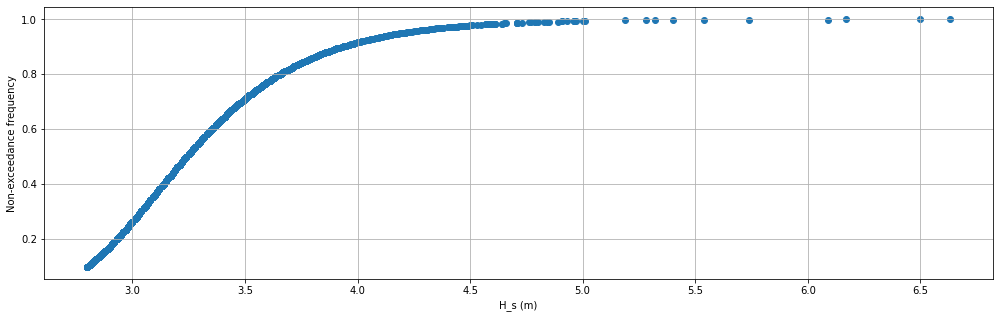

In [298]:
plt.figure(figsize=(17,5))
# plt.scatter(y[above_threshold],P_H)
plt.scatter(H_ord, P_H_O)
plt.xlabel('H_s (m)', size=10)
plt.ylabel('Non-exceedance frequency', size=10)
plt.grid()
plt.show()

In [303]:
df = pd.DataFrame([P, H_Tr, Tr_star,H_Tr])

In [315]:
df = df.T
df.column = ['P', 'H_Tr', 'Tr_star', 'H_Tr']
df.index = [1,5,10,25,50,100,500]


C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/731898110.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.column = ['P', 'H_Tr', 'Tr_star', 'H_Tr']


In [316]:
df

P      H_Tr       Tr_star      H_Tr
1    0.982671  4.588916     57.707317  4.588916
5    0.996534  5.180861    288.536585  5.180861
10   0.998267  5.435013    577.073171  5.435013
25   0.999307  5.770754   1442.682927  5.770754
50   0.999653  6.024651   2885.365854  6.024651
100  0.999827  6.278517   5770.731707  6.278517
500  0.999965  6.867926  28853.658537  6.867926

In [328]:
Tr_pp = np.array([10,25,50,100,500])

PP20 = 1-(1-1/Tr_pp)**20
PP50 = 1-(1-1/Tr_pp)**50

In [329]:
df1 = pd.DataFrame([PP20, PP50])

In [330]:
df1 = df1.T
df1.column = ['PP20', 'PP50']
df1.index = [10,25,50,100,500]

C:\Users\fadak\AppData\Local\Temp/ipykernel_6212/3744876818.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df1.column = ['PP20', 'PP50']


In [331]:
df1

0         1
10   0.878423  0.994846
25   0.557998  0.870114
50   0.332392  0.635830
100  0.182093  0.394994
500  0.039249  0.095253